In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

# Ref: https://stackoverflow.com/questions/48610132/
#      tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_virtual_device_configuration(gpus[0], 
#   [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])

2.16.2
3.4.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [3]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, 
                        padding='same',input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\phuri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          62,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,710 (248.87 KB)

 Trainable params: 63,710 (248.87 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
hist = model.fit(train_images, train_labels, batch_size=256, 
                    validation_data=(test_images, test_labels), 
                    epochs=50)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1091 - loss: 2.3179 - val_accuracy: 0.1935 - val_loss: 2.2747
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.1937 - loss: 2.1967 - val_accuracy: 0.2160 - val_loss: 1.9036
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2152 - loss: 1.8365 - val_accuracy: 0.2847 - val_loss: 1.7081
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.3050 - loss: 1.6630 - val_accuracy: 0.3151 - val_loss: 1.5323
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.3212 - loss: 1.4930 - val_accuracy: 0.3413 - val_loss: 1.4174
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3688 - loss: 1.3952 - val_accuracy: 0.3791 - val_loss: 1.3621
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3873 - loss: 1.3388 - val_accuracy: 0.3955 - val_loss: 1.3181
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4079 - loss: 1.2943 - val_accu

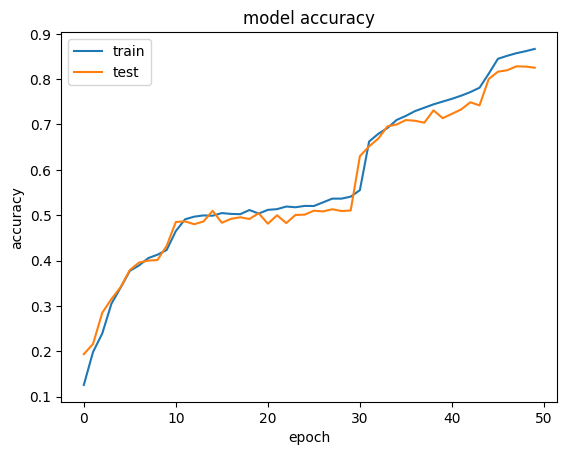

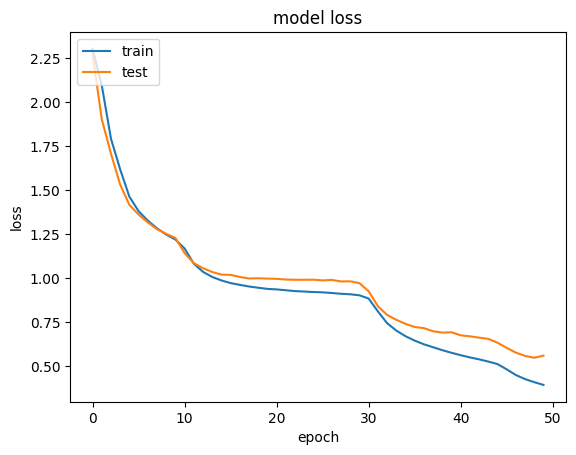

[<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=sequential_1/conv2d_1/kernel>, <KerasVariable shape=(32,), dtype=float32, path=sequential_1/conv2d_1/bias>, <KerasVariable shape=(6272, 10), dtype=float32, path=sequential_1/dense_2/kernel>, <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_2/bias>, <KerasVariable shape=(10, 10), dtype=float32, path=sequential_1/dense_3/kernel>, <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>, <KerasVariable shape=(10, 10), dtype=float32, path=sequential_1/dense_4/kernel>, <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_4/bias>, <KerasVariable shape=(10, 10), dtype=float32, path=sequential_1/dense_5/kernel>, <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_5/bias>, <KerasVariable shape=(10, 10), dtype=float32, path=sequential_1/dense_6/kernel>, <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_6/bias>, <KerasVariable shape=(10, 10), dtype=float32, pa

In [19]:
# plot accuracy history
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


print(model.trainable_variables)
# ต้องดูว่า layer นั้นๆมี path เป็นอะไรและแก้ไข path ให้ตรงกับเลเยอร์ที่เราต้องการ
# ตอนนี้เลเยอร์สุดท้ายคือ <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_8/bias>
var = [v for v in model.trainable_variables if v.path == "sequential_1/dense_8/kernel"]
# var = [v for v in model.trainable_variables if v.path == "sequential_1/dense_1/kernel"]
tf.print(var)

In [20]:
predictions = model.predict(test_images)
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
predictions[12]

array([1.3639869e-06, 1.1784678e-07, 3.3055329e-07, 9.8943154e-08,
       4.5759075e-06, 3.8531062e-01, 2.9119653e-06, 6.0535574e-01,
       9.1022440e-07, 9.3233567e-03], dtype=float32)

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

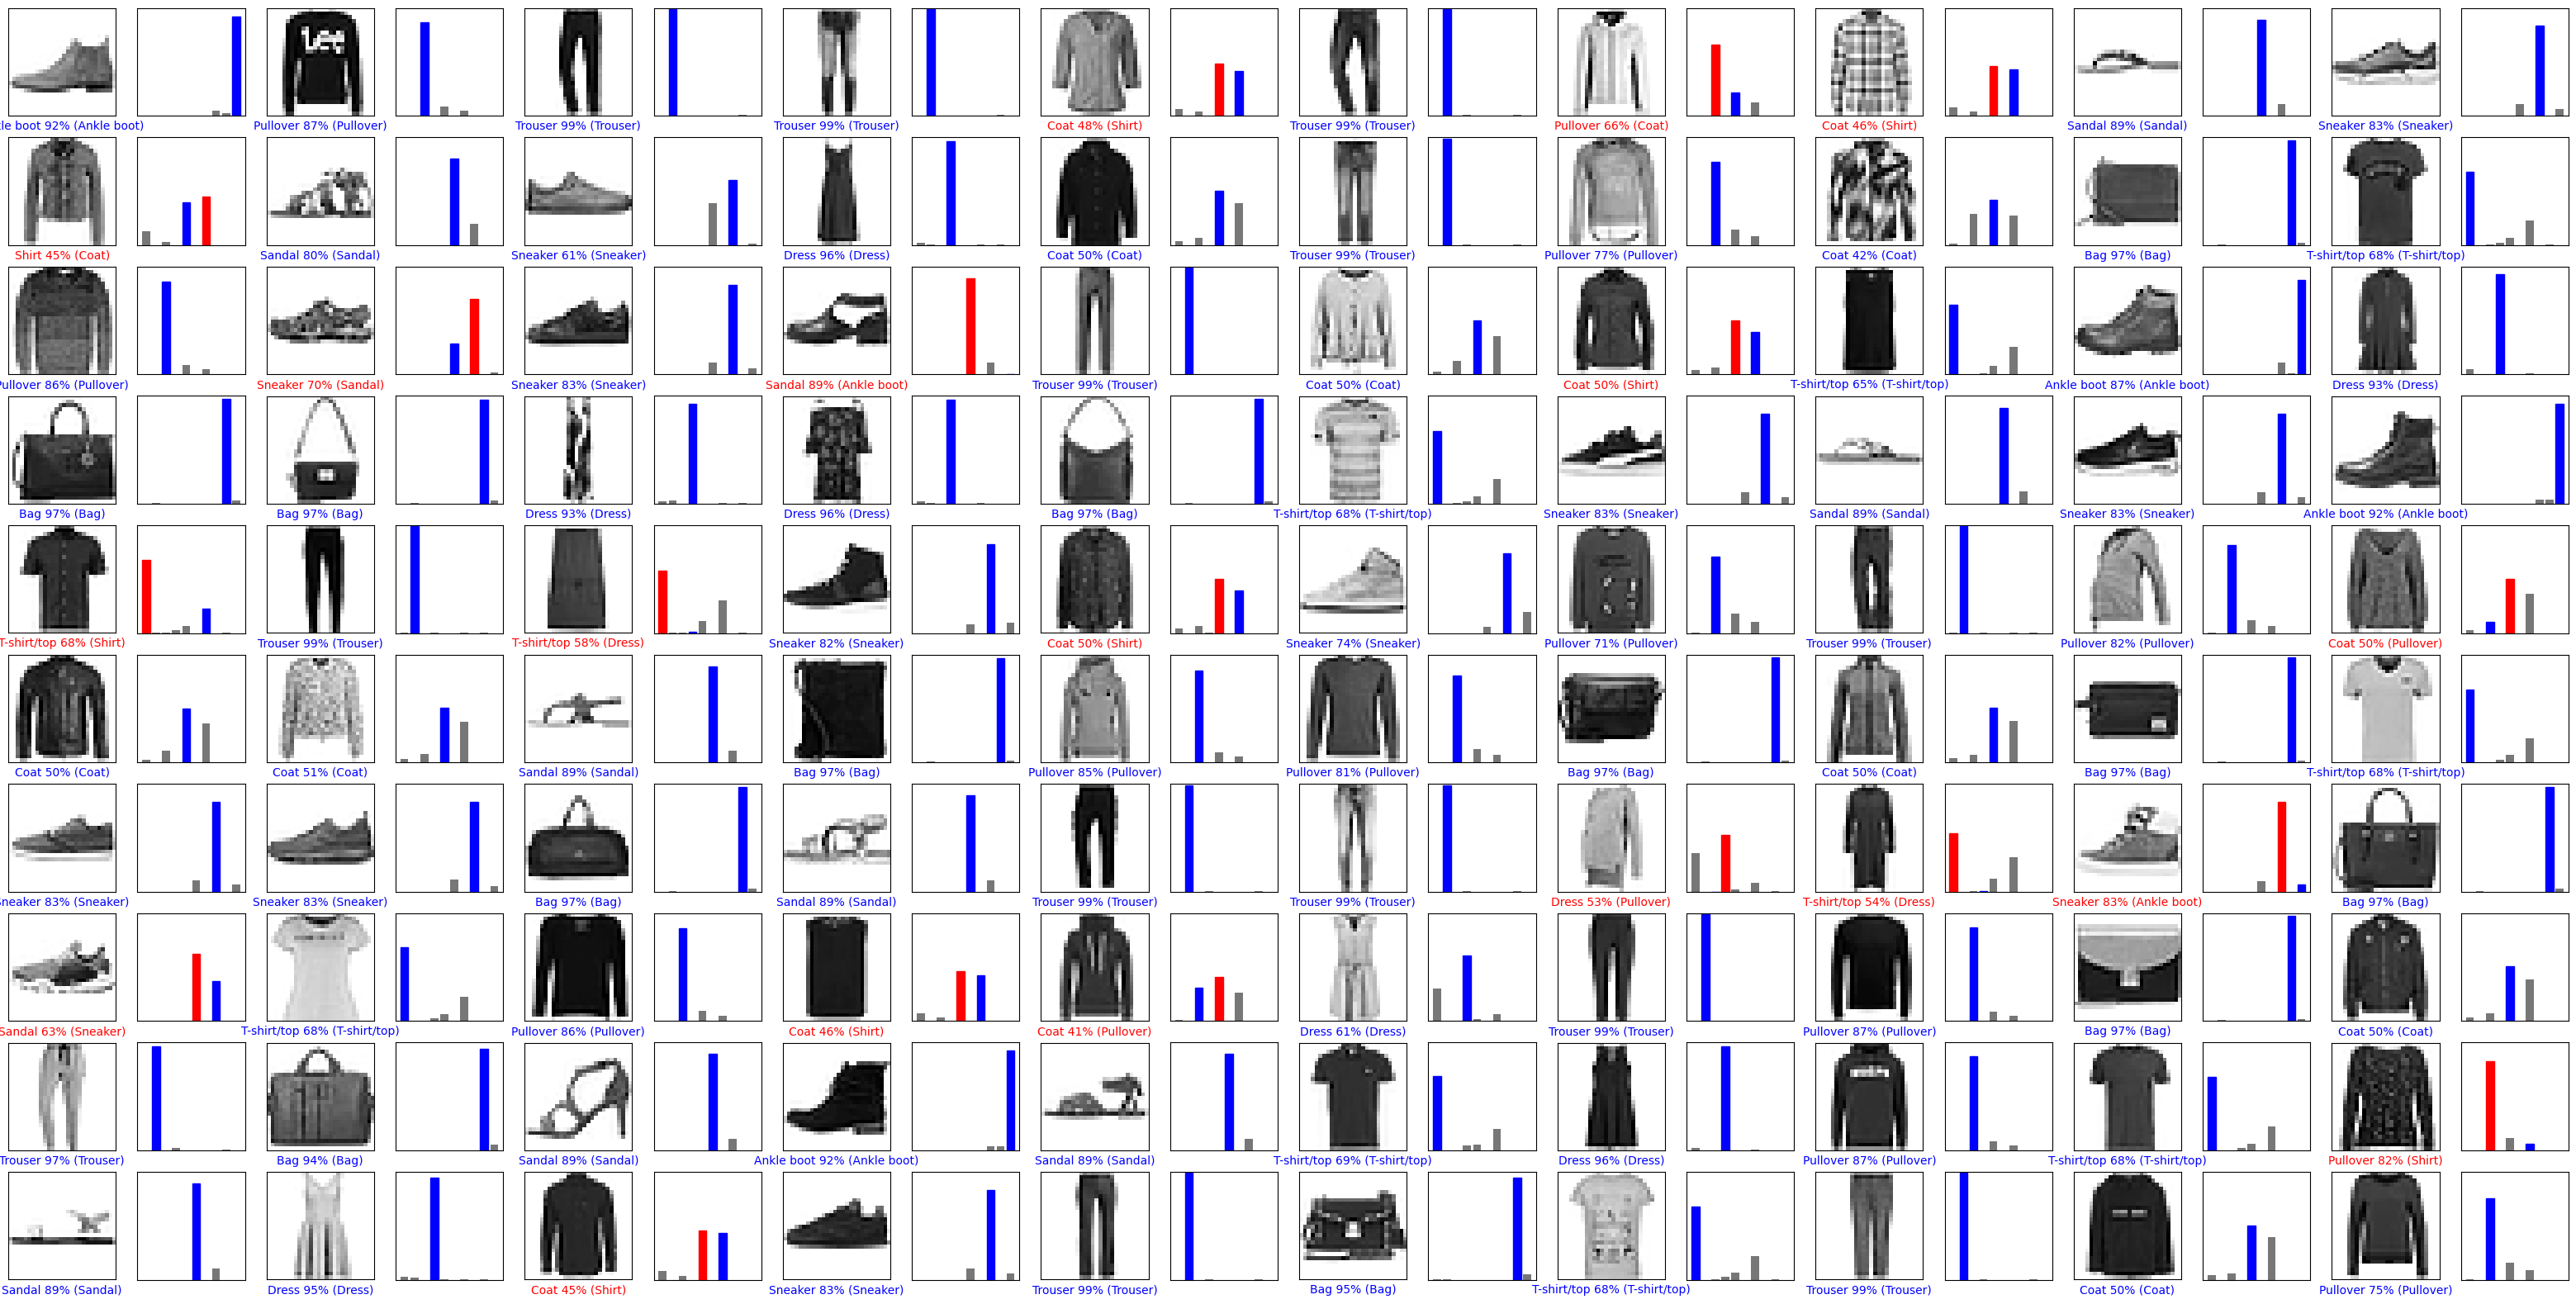

In [23]:
num_rows = 10
num_cols = 10
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)